# Práctica 5

In [2]:
install = FALSE
if (install) {
    install.packages("dplyr")
    install.packages("randomForest")
    install.packages("pdp")
    install.packages("ggplot2")
    install.packages("plotly")
    install.packages("gridExtra")
    install.packages("MASS")
}

In [3]:
library("dplyr")
library("randomForest")
library("pdp")
library("ggplot2")
library("plotly")
library("lubridate")
library("gridExtra")
library("MASS")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:randomForest’:

    combine


The following object is masked from 

In [4]:
bike_data = read.csv("day.csv")

# One-hot encoding para 'season'
bike_data <- bike_data %>%
  mutate(season_2 = as.integer(season == 2),
         season_3 = as.integer(season == 3),
         season_4 = as.integer(season == 4))

# Crear las variables MISTY y RAIN
bike_data <- bike_data %>%
  mutate(MISTY = as.integer(weathersit == 2),
         RAIN = as.integer(weathersit %in% c(3, 4)))

# Desnormalizar variables (según lo indicado en la documentación del dataset)
bike_data <- bike_data %>%
  mutate(temp = (temp * 39) + 8,
         hum = hum * 100,
         windspeed = windspeed * 67)

# Crear la variable days_since_2011
bike_data <- bike_data %>%
  mutate(days_since_2011 = as.integer(difftime(ymd(dteday), ymd("2011-01-01"), units = "days")))

In [5]:
target <- "cnt"

X <- bike_data
y <- bike_data[, target]

set.seed(27)

rf_model <- randomForest(x = X, y = y, ntree = 100)

In [6]:
pdp_days <- partial(rf_model, pred.var = "days_since_2011")
pdp_temp <- partial(rf_model, pred.var = "temp")
pdp_hum <- partial(rf_model, pred.var = "hum")
pdp_windspeed <- partial(rf_model, pred.var = "windspeed")

plot_days <- autoplot(pdp_days, ylab = "Predicted Bike Rentals", xlab = "Days Since 2011") +
  ggtitle("Partial Dependence Plot for Days Since 2011")

plot_temp <- autoplot(pdp_temp, ylab = "Predicted Bike Rentals", xlab = "Temperature") +
  ggtitle("Partial Dependence Plot for Temperature")

plot_hum <- autoplot(pdp_hum, ylab = "Predicted Bike Rentals", xlab = "Humidity") +
  ggtitle("Partial Dependence Plot for Humidity")

plot_windspeed <- autoplot(pdp_windspeed, ylab = "Predicted Bike Rentals", xlab = "Wind Speed") +
  ggtitle("Partial Dependence Plot for Wind Speed")

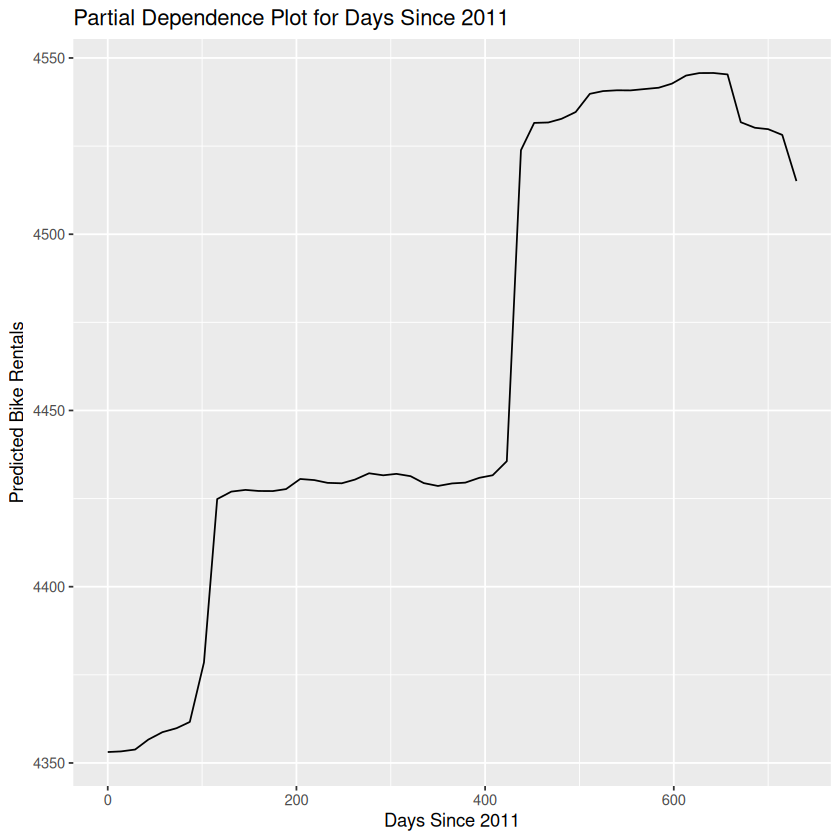

In [7]:
plot_days

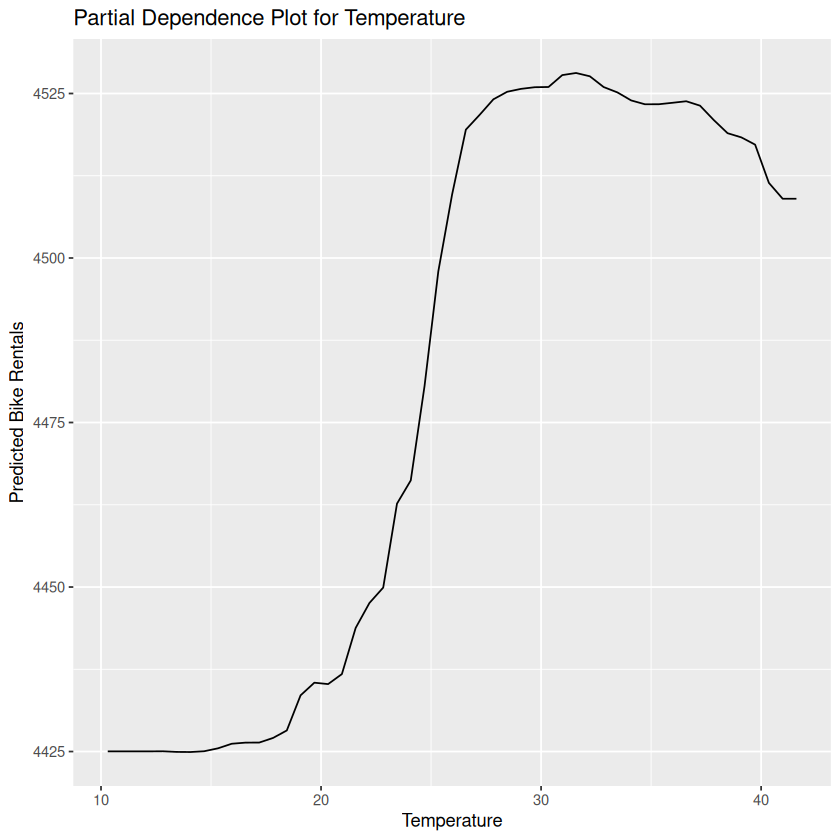

In [8]:
plot_temp

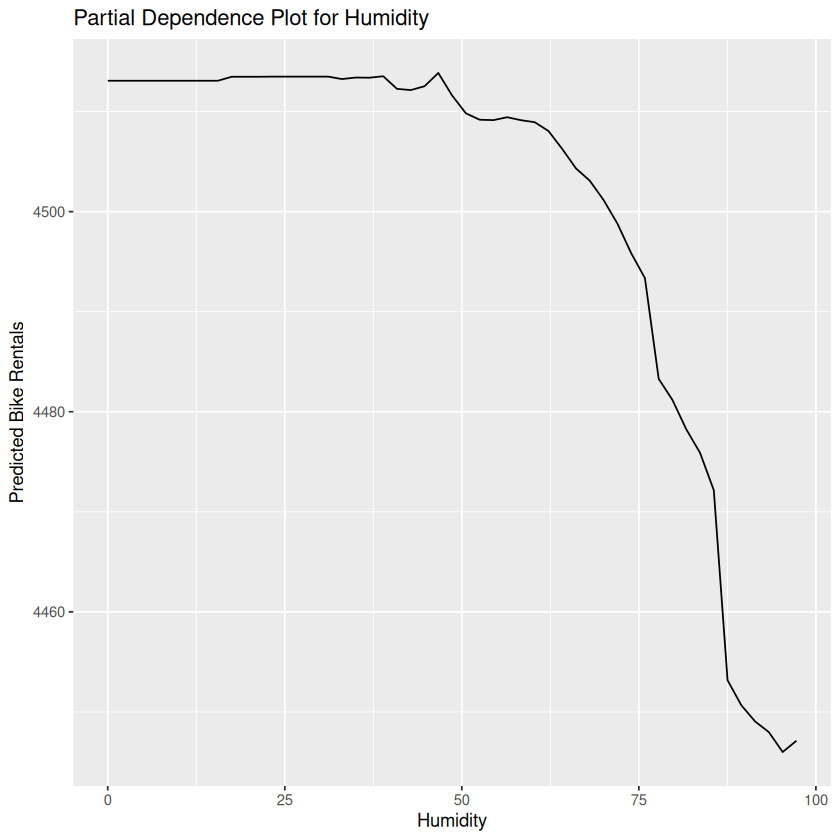

In [9]:
plot_hum

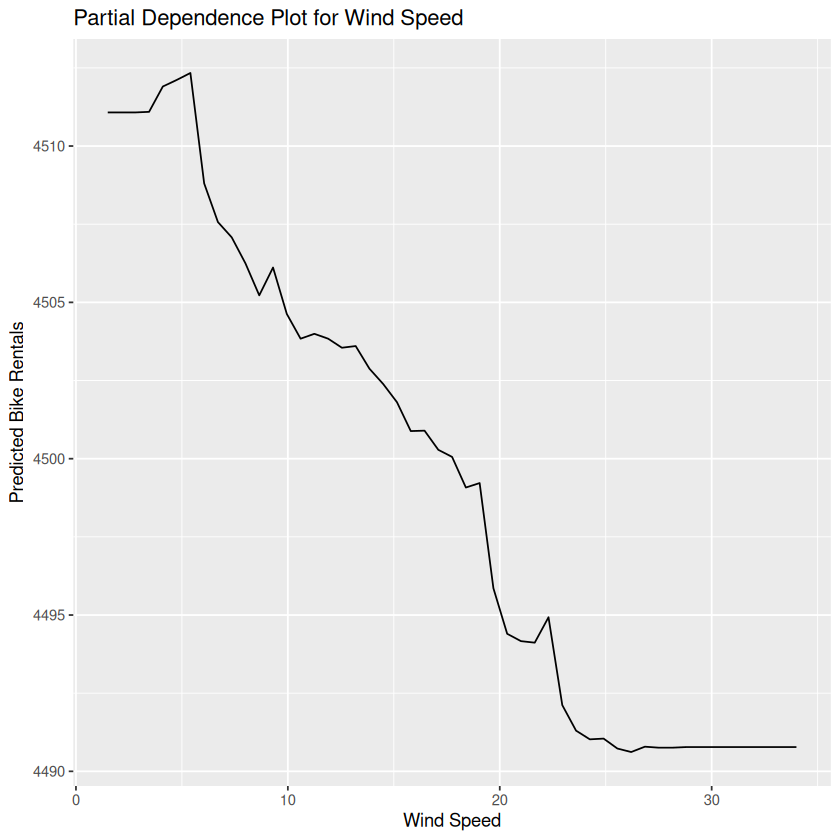

In [10]:
plot_windspeed

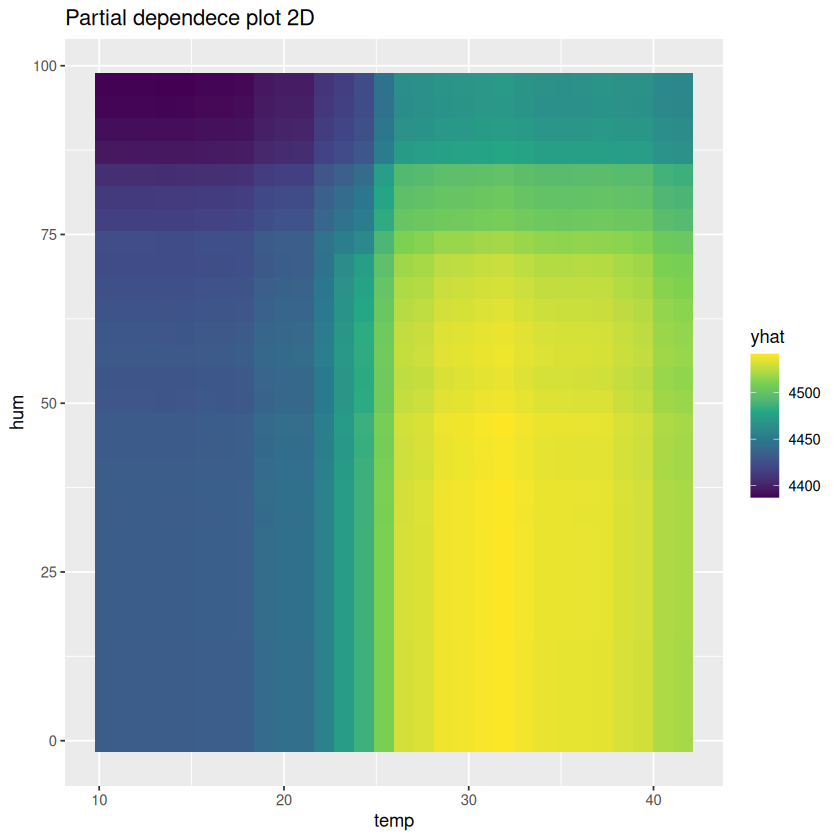

In [11]:
pdp_2d <- partial(rf_model, pred.var = c("temp", "hum"), grid.resolution = 30)

plot_2d <- autoplot(pdp_2d, ylab = "hum", xlab = "temp") +
  ggtitle("Partial dependece plot 2D")
plot_2d

In [12]:
house_data = read.csv("kc_house_data.csv")

In [13]:
features_house <- c("bedrooms", "bathrooms", "sqft_living", "floors", "sqft_lot", "yr_built")
target_house <- "price"

X_house <- house_data[, features_house]
y_house <- house_data[, target_house]

rf_model_house <- randomForest(x = X_house, y = y_house, ntree = 100)

pdp_bedrooms <- partial(rf_model_house, pred.var = "bedrooms")
pdp_bathrooms <- partial(rf_model_house, pred.var = "bathrooms")
pdp_sqft_living <- partial(rf_model_house, pred.var = "sqft_living")
pdp_floors <- partial(rf_model_house, pred.var = "floors")

plot_bedrooms <- autoplot(pdp_bedrooms, ylab = "Predicted House Price", xlab = "Bedrooms") +
  ggtitle("Partial Dependence Plot for Bedrooms") + theme_bw()

plot_bathrooms <- autoplot(pdp_bathrooms, ylab = "Predicted House Price", xlab = "Bathrooms") +
  ggtitle("Partial Dependence Plot for Bathrooms") + theme_bw()

plot_sqft_living <- autoplot(pdp_sqft_living, ylab = "Predicted House Price", xlab = "Sqft Living") +
  ggtitle("Partial Dependence Plot for Sqft Living") + theme_bw()

plot_floors <- autoplot(pdp_floors, ylab = "Predicted House Price", xlab = "Floors") +
  ggtitle("Partial Dependence Plot for Floors") + theme_bw()

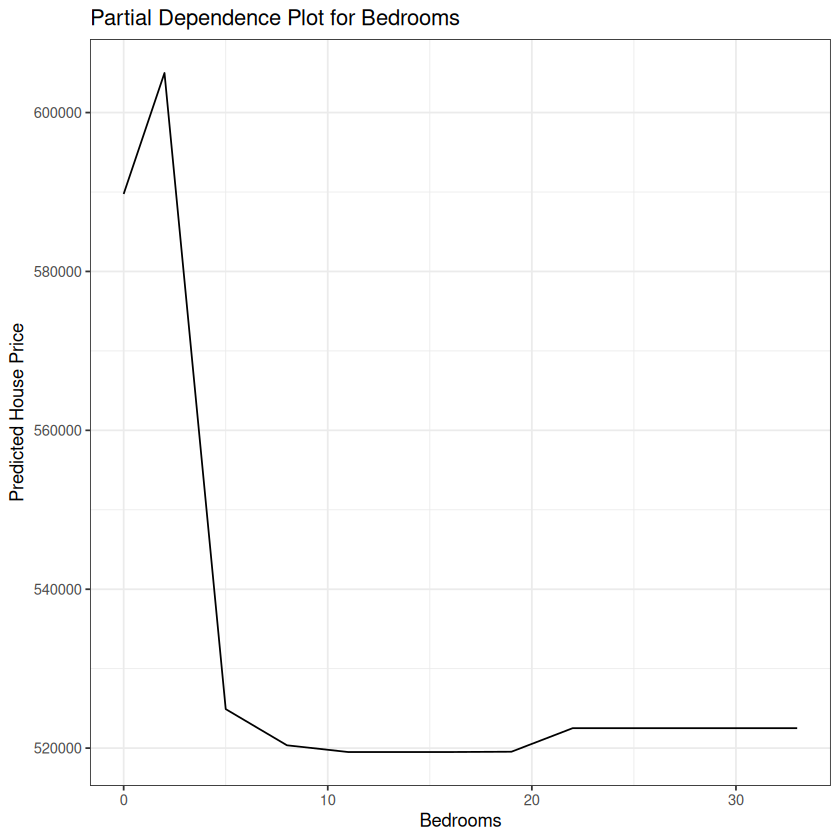

In [14]:
plot_bedrooms

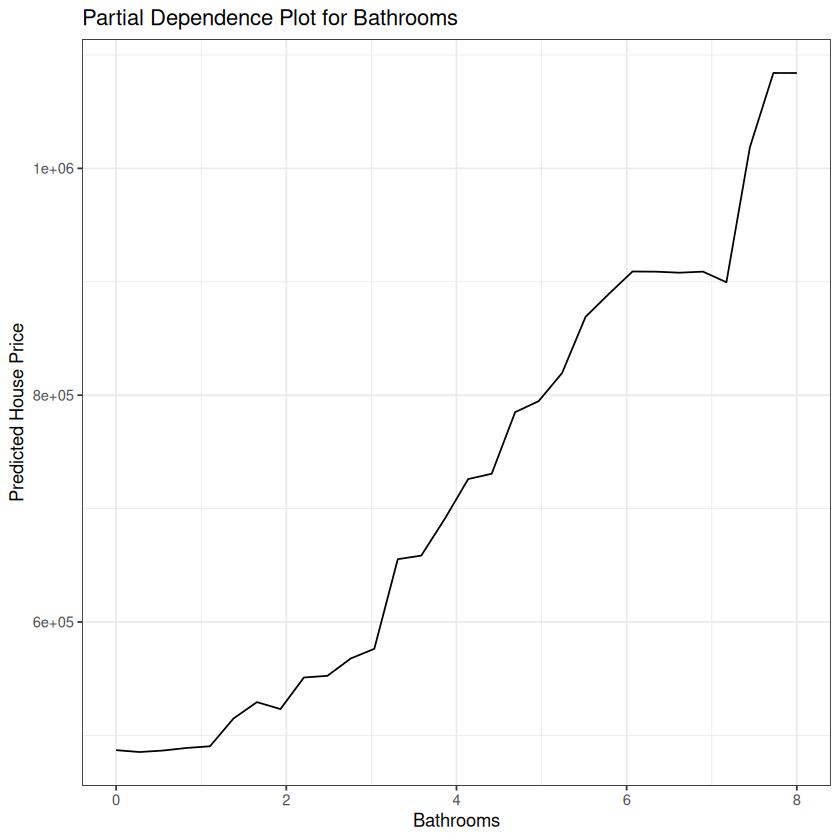

In [15]:
plot_bathrooms

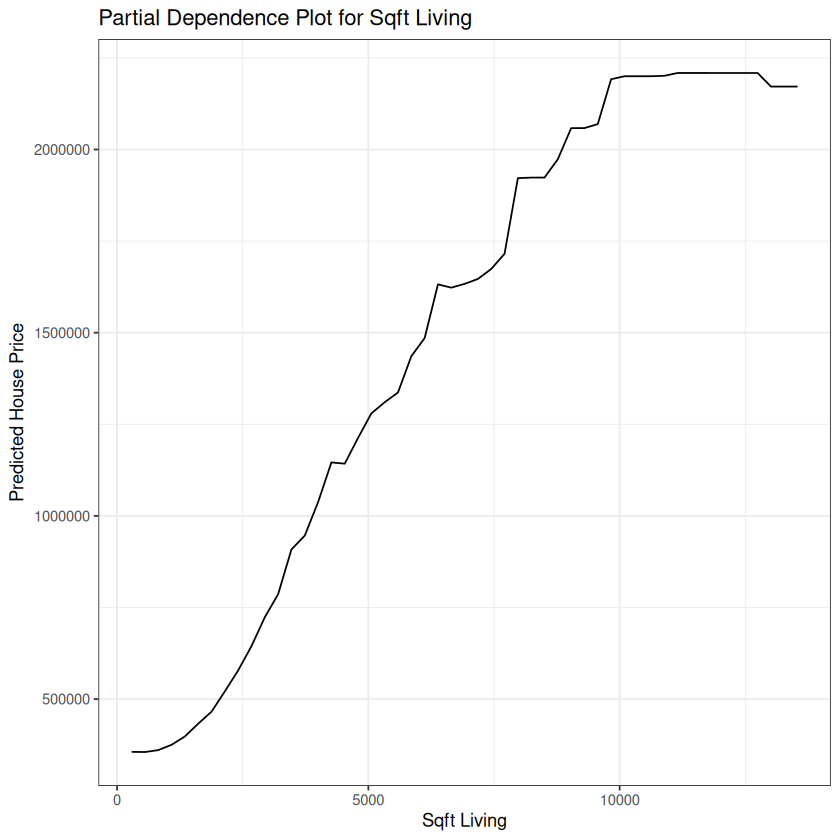

In [16]:
plot_sqft_living

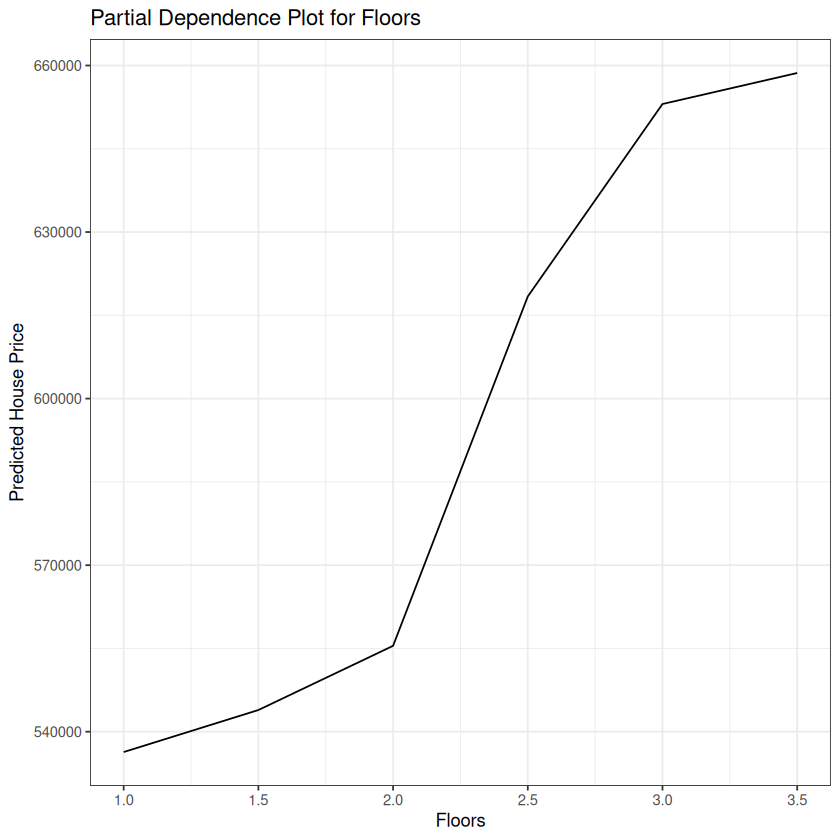

In [17]:
plot_floors